In [1]:
#Importing & Preprocessing Data:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"/content/drive/MyDrive/GOOGL.csv", date_parser=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [3]:
# Divide Data into Training and Test set


# Training Data


data_training = data[data['Date']<'2020-05-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
3947,2020-04-24,1255.000000,1277.709961,1244.000000,1276.599976,1276.599976,1870100
3948,2020-04-27,1292.000000,1294.099976,1265.060059,1270.859985,1270.859985,2209300
3949,2020-04-28,1283.199951,1284.760010,1230.380005,1232.589966,1232.589966,4035000
3950,2020-04-29,1345.000000,1360.150024,1326.729980,1342.180054,1342.180054,5417900


In [4]:
# Divide Data into Training and Test set


# Test Data


data_test = data[data['Date']>='2020-05-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3952,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600
3953,2020-05-04,1308.130005,1324.469971,1296.010010,1322.900024,1322.900024,1540300
3954,2020-05-05,1337.500000,1371.010010,1335.030029,1349.020020,1349.020020,1983300
3955,2020-05-06,1358.000000,1368.689941,1345.130005,1345.430054,1345.430054,1586600
3956,2020-05-07,1361.310059,1376.000000,1352.540039,1369.280029,1369.280029,1532600
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [5]:
training_data = data_training.drop(['Date','Adj Close'],axis=1)
training_data.head()

,Open,High,Low,Close,Volume
0,50.050049,52.082081,48.028027,50.220219,44659096
1,50.555557,54.594597,50.300301,54.209209,22834343
2,55.430431,56.796799,54.579578,54.754753,18256126
3,55.675674,55.855858,51.836838,52.487488,15247337
4,52.532532,54.054054,51.991993,53.053055,9188602


In [6]:
# Here we have to predict the Open i.e opening price of that particular stock.

# Data Preprocessing


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

training_data = scaler.fit_transform(training_data)
training_data

array([[2.74374163e-04, 7.84663493e-04, 0.00000000e+00, 1.11990322e-04,
        5.40710393e-01],
       [6.16498751e-04, 2.48251700e-03, 1.54266675e-03, 2.81672967e-03,
        2.73350337e-01],
       [3.91578236e-03, 3.97067326e-03, 4.44790544e-03, 3.18663642e-03,
        2.17265746e-01],
       ...,
       [8.34862357e-01, 8.33776990e-01, 8.02709128e-01, 8.01819184e-01,
        4.30525002e-02],
       [8.76688236e-01, 8.84722417e-01, 8.68121971e-01, 8.76126871e-01,
        5.99934581e-02],
       [8.67456761e-01, 8.77863454e-01, 8.64571292e-01, 8.79191593e-01,
        2.78265861e-02]])

In [7]:
X_train = []
y_train = []

for i in range(30, training_data.shape[0]):
    X_train.append(training_data[i-30:i])
    y_train.append(training_data[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape

(3922, 30, 5)

In [ ]:
#Build The RNN Model:


In [8]:
# Building LSTM

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

regression = Sequential()
regression.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], 5)))
regression.add(Dropout(0.2))

regression.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], 5)))
regression.add(Dropout(0.3))

regression.add(LSTM(units=50, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], 5)))
regression.add(Dropout(0.4))

regression.add(LSTM(units=50, activation="relu"))
regression.add(Dropout(0.5))

regression.add(Dense(units=1))

regression.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            11200     
                                                                 
 dropout (Dropout)           (None, 30, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 30, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 30, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [11]:
# Compile and Fit the model

regression.compile(optimizer='adam', loss="mean_squared_error")
regression.fit(X_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
123/123 [==============================] - 13s 57ms/step - loss: 0.0030
Epoch 2/20
123/123 [==============================] - 9s 71ms/step - loss: 0.0029
Epoch 3/20
123/123 [==============================] - 7s 57ms/step - loss: 0.0031
Epoch 4/20
123/123 [==============================] - 9s 71ms/step - loss: 0.0028
Epoch 5/20
123/123 [==============================] - 7s 61ms/step - loss: 0.0028
Epoch 6/20
123/123 [==============================] - 8s 67ms/step - loss: 0.0027
Epoch 7/20
123/123 [==============================] - 8s 68ms/step - loss: 0.0029
Epoch 8/20
123/123 [==============================] - 7s 59ms/step - loss: 0.0029
Epoch 9/20
123/123 [==============================] - 9s 71ms/step - loss: 0.0030
Epoch 10/20
123/123 [==============================] - 7s 58ms/step - loss: 0.0028
Epoch 11/20
123/123 [==============================] - 9s 71ms/step - loss: 0.0031
Epoch 12/20
123/123 [==============================] - 7s 58ms/step - loss: 0.0028
Epoch 13/20


In [12]:
loss=0.0030
accuracy=(1-loss)*100
accuracy

99.7

In [13]:
#Predict Values:
# Prepare test data

data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3952,2020-05-01,1324.089966,1351.430054,1309.660034,1317.319946,1317.319946,2443600
3953,2020-05-04,1308.130005,1324.469971,1296.010010,1322.900024,1322.900024,1540300
3954,2020-05-05,1337.500000,1371.010010,1335.030029,1349.020020,1349.020020,1983300
3955,2020-05-06,1358.000000,1368.689941,1345.130005,1345.430054,1345.430054,1586600
3956,2020-05-07,1361.310059,1376.000000,1352.540039,1369.280029,1369.280029,1532600


In [14]:
past_30_days = data_training.tail(30)

df = past_30_days.append(data_test, ignore_index=True)
df = df.drop(['Date', 'Adj Close'],axis=1)
df.head()

<ipython-input-14-e334950e9974>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_30_days.append(data_test, ignore_index=True)


,Open,High,Low,Close,Volume
0,1088.219971,1152.609985,1055.550049,1111.670044,3703200
1,1130.900024,1138.479980,1062.099976,1068.209961,4143900
2,1056.369995,1066.910034,1008.869995,1054.130005,4183600
3,1103.979980,1133.329956,1086.430054,1130.010010,3623400
4,1124.579956,1146.170044,1083.010010,1101.619995,4516200


In [15]:
inputs = scaler.transform(df)
inputs

array([[0.70290115, 0.74447552, 0.68401554, 0.71982929, 0.03898785],
       [0.73178674, 0.73492705, 0.68846234, 0.69036113, 0.04438656],
       [0.68134529, 0.68656306, 0.65232404, 0.6808142 , 0.0448729 ],
       ...,
       [1.80865337, 1.87190389, 1.81540341, 1.86281341, 0.01536434],
       [1.84386019, 1.85215149, 1.83894113, 1.84121742, 0.00902971],
       [1.85059425, 1.87959395, 1.83779381, 1.88592128, 0.00976717]])

In [16]:
X_test = []
y_test = []

for i in range(30, inputs.shape[0]):
    X_test.append(inputs[i-30:i])
    y_test.append(inputs[i,0])

X_test, y_test = np.array(X_test),np.array(y_test)
X_test.shape, y_test.shape

((479, 30, 5), (479,))

In [17]:
y_pred = regression.predict(X_test)
y_pred

15/15 [==============================] - 1s 17ms/step


array([[0.7020935 ],
       [0.7071154 ],
       [0.7124194 ],
       [0.71807075],
       [0.72394407],
       [0.7299268 ],
       [0.73607284],
       [0.74230176],
       [0.747985  ],
       [0.7515427 ],
       [0.75244254],
       [0.751635  ],
       [0.7503576 ],
       [0.74962056],
       [0.750159  ],
       [0.7521061 ],
       [0.7550044 ],
       [0.75864553],
       [0.76225376],
       [0.76528287],
       [0.7678093 ],
       [0.77015364],
       [0.772439  ],
       [0.77460706],
       [0.77594256],
       [0.7762971 ],
       [0.77632713],
       [0.7767799 ],
       [0.7781273 ],
       [0.7785447 ],
       [0.77756214],
       [0.77543485],
       [0.7738919 ],
       [0.7736915 ],
       [0.774251  ],
       [0.774512  ],
       [0.7747985 ],
       [0.77577364],
       [0.7771484 ],
       [0.7782258 ],
       [0.77629447],
       [0.7719187 ],
       [0.7673063 ],
       [0.7643721 ],
       [0.76435626],
       [0.7679664 ],
       [0.77432287],
       [0.782

In [18]:
scaler.scale_

array([6.76793618e-04, 6.75758288e-04, 6.78908771e-04, 6.78051173e-04,
       1.22503130e-08])

In [19]:
scale = 1/2.13419869e-03
scale

468.55993525138933

In [20]:
y_pred = y_pred * scale
y_test = y_test * scale

In [21]:
# Visualize The Data and Check Accuracy:

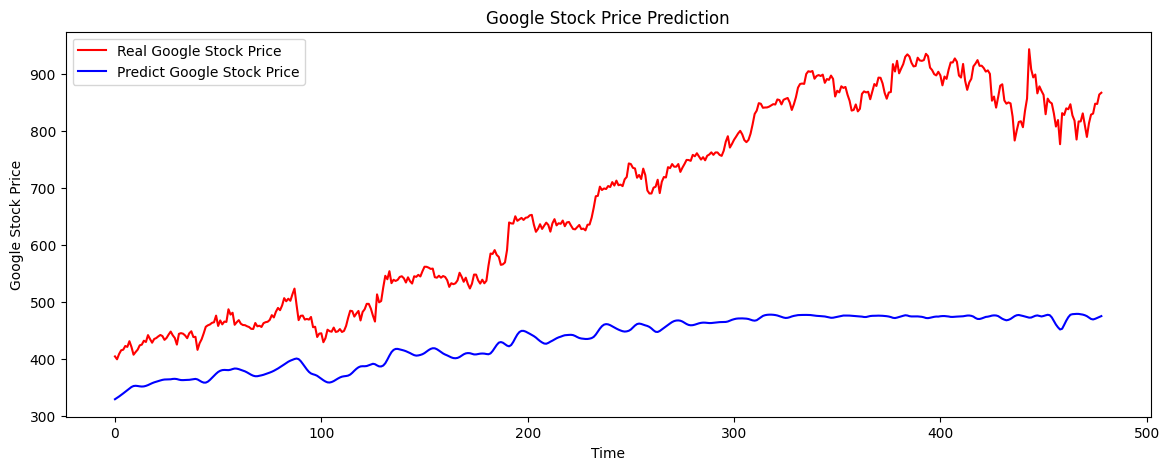

In [22]:
# Visualize the data

plt.figure(figsize=(14,5))
plt.plot(y_test, color="red", label="Real Google Stock Price")
plt.plot(y_pred, color="blue", label="Predict Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()